In [3]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import requests

In [6]:
url = 'https://archive-api.open-meteo.com/v1/archive?latitude=29.1026&longitude=-110.9773&start_date=2021-01-01&end_date=2024-11-10&daily=precipitation_sum&timezone=America%2FDenver&format=csv'

ruta_descarga = '/data/raw'

# Realizar la descarga y guardar el archivo
response = requests.get(url)
with open(ruta_descarga, 'wb') as f:
    f.write(response.content)

# Cargar el archivo CSV local
df_lluvia_hmo = pd.read_csv(ruta_descarga)

df_lluvia_hmo

FileNotFoundError: [Errno 2] No such file or directory: '/data/raw'

In [ ]:
df_lluvia_hmo = pd.read_csv('https://archive-api.open-meteo.com/v1/archive?latitude=29.1026&longitude=-110.9773&start_date=2021-01-01&end_date=2024-11-10&daily=precipitation_sum&timezone=America%2FDenver&format=csv')

In [ ]:
df_lluvia_hmo

,latitude,longitude,elevation,utc_offset_seconds,timezone,timezone_abbreviation
0,29.06854,-110.975876,214.0,-25200.0,America/Denver,MST
1,time,precipitation_sum (mm),NaN,NaN,NaN,NaN
2,2021-01-01,4.00,NaN,NaN,NaN,NaN
3,2021-01-02,0.00,NaN,NaN,NaN,NaN
4,2021-01-03,0.00,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...
1407,2024-11-06,0.00,NaN,NaN,NaN,NaN
1408,2024-11-07,0.00,NaN,NaN,NaN,NaN
1409,2024-11-08,NaN,NaN,NaN,NaN,NaN
1410,2024-11-09,NaN,NaN,NaN,NaN,NaN


In [ ]:
df_lluvia_hmo.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1412 entries, 0 to 1411
Data columns (total 6 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   latitude               1412 non-null   object 
 1   longitude              1409 non-null   object 
 2   elevation              1 non-null      float64
 3   utc_offset_seconds     1 non-null      float64
 4   timezone               1 non-null      object 
 5   timezone_abbreviation  1 non-null      object 
dtypes: float64(2), object(4)
memory usage: 66.3+ KB


In [ ]:
df_lluvia_hmo.drop([0, 1], inplace=True)
df_lluvia_hmo.reset_index(drop=True, inplace=True)

df_lluvia_hmo.drop(['elevation', 'utc_offset_seconds', 'timezone', 'timezone_abbreviation'], axis=1, inplace=True)
df_lluvia_hmo.rename(columns={'latitude': 'time', 'longitude': 'precipitation_sum (mm)'}, inplace=True)
df_lluvia_hmo.dropna(inplace=True)

df_lluvia_hmo['time'] = pd.to_datetime(df_lluvia_hmo['time'])
df_lluvia_hmo['precipitation_sum (mm)'] = df_lluvia_hmo['precipitation_sum (mm)'].astype(float)

df_lluvia_hmo

,time,precipitation_sum (mm)
0,2021-01-01,4.0
1,2021-01-02,0.0
2,2021-01-03,0.0
3,2021-01-04,0.0
4,2021-01-05,0.0
...,...,...
1402,2024-11-03,0.0
1403,2024-11-04,0.0
1404,2024-11-05,0.0
1405,2024-11-06,0.0


In [ ]:
df_lluvia_hmo.info()

<class 'pandas.core.frame.DataFrame'>
Index: 1407 entries, 0 to 1406
Data columns (total 2 columns):
 #   Column                  Non-Null Count  Dtype         
---  ------                  --------------  -----         
 0   time                    1407 non-null   datetime64[ns]
 1   precipitation_sum (mm)  1407 non-null   float64       
dtypes: datetime64[ns](1), float64(1)
memory usage: 33.0 KB


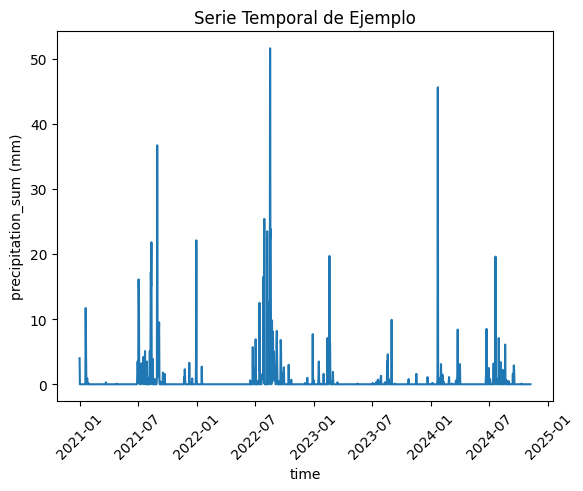

In [ ]:
sns.lineplot(x='time', y='precipitation_sum (mm)', data=df_lluvia_hmo)
# Mostrar el gráfico
plt.xticks(rotation=45)  # Rotar las etiquetas del eje x para mejor visualización
plt.title('Serie Temporal de Ejemplo')
plt.show()